In [2]:
import pandas as pd
import numpy as np
import seaborn as sns #For adding beautiful interface and colors
import matplotlib.pyplot as plt
%matplotlib inline
color = sns.color_palette()

In [6]:
data=pd.read_csv('C:/Users/sai charan/Downloads/__MACOSX/Data_Analysis_Playstore_Analysis-main/data1.csv')
data.head()## it will display top number of rows as per requirement.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [8]:
data.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


# 1. Data clean up – Missing value treatment
# a. Drop records where rating is missing since rating is our target/study variable

In [11]:
print(data.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


# As we can see there is missing of values in Rating,Type,Content Rating,Current Ver , Android Ver

In [12]:
data1=data.dropna(subset=["Rating"])

In [14]:
print(data1.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64


# b. Check the null values for the Android Ver column. 


In [19]:
print(data1["Android Ver"].isnull().sum())

3


In [18]:

print (data1[data1.isna().any(axis=1)])

                                           App            Category  Rating  \
15             Learn To Draw Kawaii Characters      ART_AND_DESIGN     3.2   
1553                      Market Update Helper  LIBRARIES_AND_DEMO     4.1   
4453                    [substratum] Vacuum: P     PERSONALIZATION     4.4   
4490                      Pi Dark [substratum]     PERSONALIZATION     4.5   
6322                    Virtual DJ Sound Mixer               TOOLS     4.2   
7333                               Dots puzzle              FAMILY     4.0   
10472  Life Made WI-Fi Touchscreen Photo Frame                 1.9    19.0   

      Reviews         Size    Installs  Type     Price Content Rating  \
15         55   2700.00000      5,000+  Free         0       Everyone   
1553    20145     11.00000  1,000,000+  Free         0       Everyone   
4453      230  11000.00000      1,000+  Paid     $1.49       Everyone   
4490      189   2100.00000     10,000+  Free         0       Everyone   
6322     4

# i. Are all 3 records having the same problem?
4453 4490 10472 are having  problem as NaN

# ii. Drop the 3rd record i.e. record for “Life Made WIFI …”

In [20]:
data2 = data1.drop(10472)
# Verification
verify = data2[data2["App"]=='Life Made WI-Fi Touchscreen Photo Frame']
print (verify)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


# iii. Replace remaining missing values with the mode


In [21]:
import statistics
Android_list = data2['Android Ver'].to_list()

In [28]:
data2['Android Ver'] = data2['Android Ver'].fillna(statistics.mode(Android_list))

print(data2_new.loc[[4453]])
print('--------------------------------------------------------------------')
print(data2_new.loc[[4490]])

4453    4.1 and up
Name: Android Ver, dtype: object
--------------------------------------------------------------------
4490    4.1 and up
Name: Android Ver, dtype: object


# c. Current ver – replace with most common value

In [31]:
Android_list = data2['Current Ver'].to_list()
data2['Current Ver'] = data2['Current Ver'].fillna(statistics.mode(Android_list))
print(data2['Current Ver'].isnull().sum())

0


# 2. Data clean up – correcting the data types

# a. Which all variables need to be brought to numeric types?

In [34]:

data2['Reviews'] = data2['Reviews'].astype(int)
data2['Size'] = data2['Size'].astype(int)
data2.info() #Size in float and Reviews in object are converted to Int


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   int32  
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(1), int32(2), object(10)
memory usage: 1.2+ MB


# b. Price variable – remove $ sign and convert to float

In [36]:
data2['Price'] = data2['Price'].str.replace('$', '').astype(float)
data2.info() # price is converted into float and dollar sign is removed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   int32  
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), int32(2), object(9)
memory usage: 1.2+ MB


<ipython-input-36-75f2788573b3>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data2['Price'] = data2['Price'].str.replace('$', '').astype(float)


# c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [41]:
data2['Installs'] = data2['Installs'].str.replace('[+,]','').astype(int)

In [39]:
data2.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


# d. Convert all other identified columns to numeric

# 3. Sanity checks – check for the following and handle accordingly

# a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store

In [42]:
pd.unique(data2[['Rating']].values.ravel())

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

# No such Observations are noted in values 

# b. Reviews should not be more than installs as only those who installed can review the app


In [44]:
df = pd.DataFrame()
df = data2[data2.Reviews <= data2.Installs]
df.head(4)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up


In [46]:
df.shape

(9359, 13)

# As per your requirement we get the value of sorted data as 9359

# 4. Identify and handle outliers – 

# a. Price column
# i. Make suitable plot to identify outliers in price

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


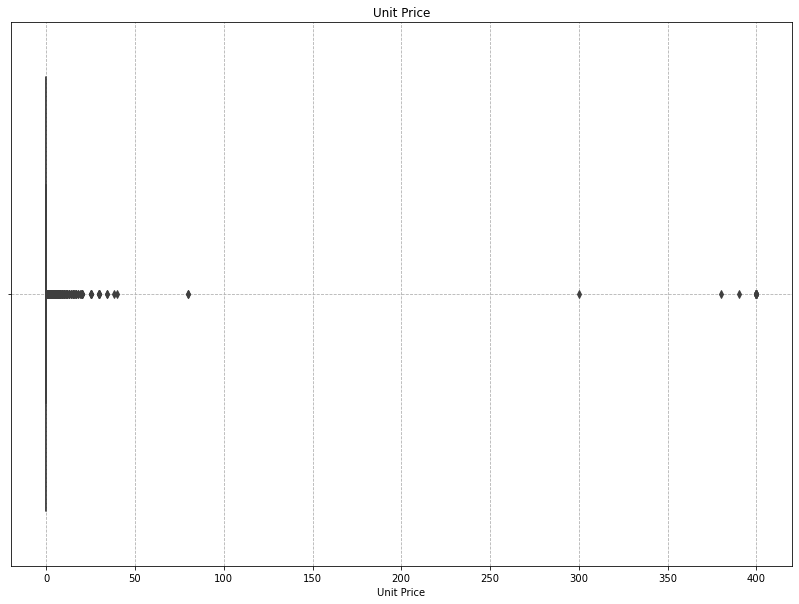

In [51]:
plt.subplots(figsize=(14,10))
sns.boxplot(df.Price)

plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.grid(linestyle='--')
plt.show()

# ii. Do you expect apps on the play store to cost   $200? Check out these cases

In [52]:
c_df = data2[data2['Price'] == 200]
print(c_df)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


# in original dataframe there is a row of app $200 but if you see rating colmn is blank and priviously we drop data whose Rating value is null. Hence in new data frame we got Empty DataFrame

# iii. After dropping the useless records, make the suitable plot again to identify
outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


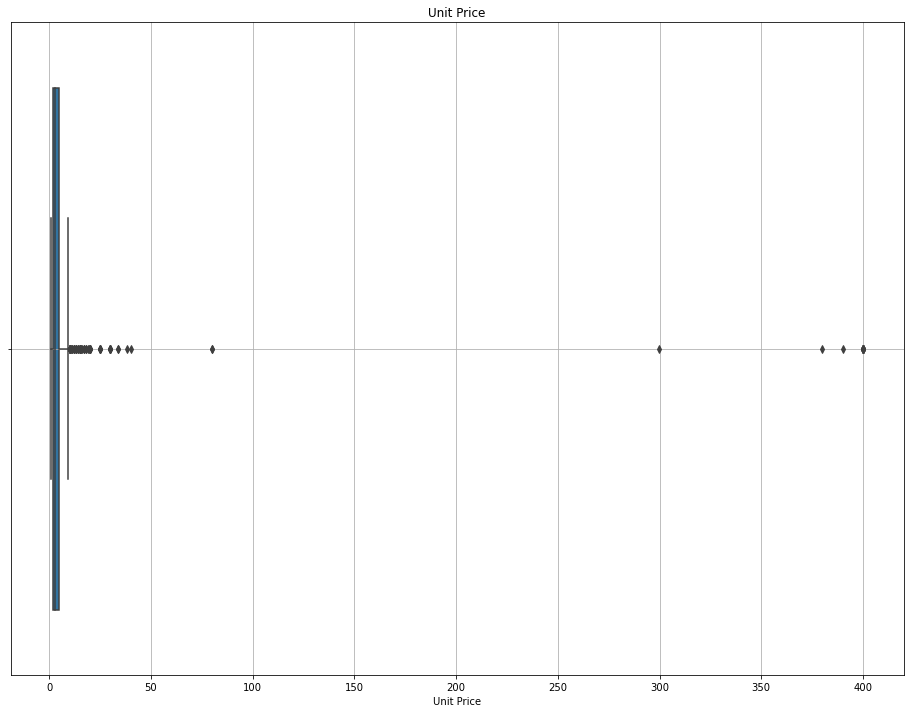

In [53]:
ud = df[df['Price'] != 0]
plt.subplots(figsize=(16,12))
sns.boxplot(ud.Price)

plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.grid()
plt.show()

# iv. Limit data to records with price < $30

In [54]:
Limitdata = df[df['Price'] < 30]
Limitdata.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [55]:
Limitdata.shape

(9338, 13)

# As per given data  we have 9338 Rows to price less than 30 dollars

#
b. Reviews column

# i. Make suitable plot

Category
GAME                   1585419555
COMMUNICATION           815461799
SOCIAL                  621241071
FAMILY                  410223081
TOOLS                   273184168
PHOTOGRAPHY             213516607
SHOPPING                115041033
PRODUCTIVITY            114116717
VIDEO_PLAYERS           110379692
PERSONALIZATION          89345815
SPORTS                   70829568
TRAVEL_AND_LOCAL         62617772
ENTERTAINMENT            59178154
NEWS_AND_MAGAZINES       54399899
EDUCATION                39595010
HEALTH_AND_FITNESS       37893622
MAPS_AND_NAVIGATION      30659060
BOOKS_AND_REFERENCE      21958660
FINANCE                  17550406
WEATHER                  14604695
BUSINESS                 13954086
LIFESTYLE                12871520
FOOD_AND_DRINK            8883009
DATING                    7291039
HOUSE_AND_HOME            3976004
COMICS                    3381945
ART_AND_DESIGN            1714372
MEDICAL                   1585618
AUTO_AND_VEHICLES         1163630
LIBRA

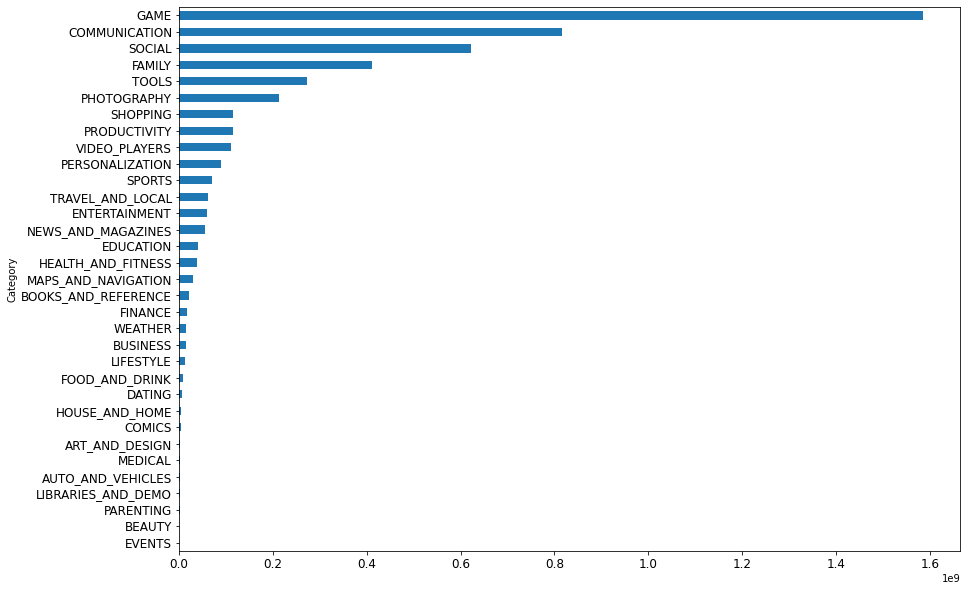

In [59]:
total=df.groupby('Category')['Reviews'].sum().sort_values()
plt.subplots(figsize=(14,10))
total.plot(kind='barh', fontsize=12)
print(total.sort_values(ascending=False))
plt.show()

# ii. Limit data to apps with < 1 Million reviews

In [60]:

limit_data_by_review = df[df['Reviews'] < 1000000]
limit_data_by_review.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [61]:
limit_data_by_review.shape

(8655, 13)

# There are 8655 Rows with less than 1 Million Reviews 

# c. Installs

# i. What is the 95th percentile of the installs?
## ii. Drop records having a value more than the 95th percentile


In [63]:
val = df.Installs.quantile(0.95) # 95th percentile
print(val)

100000000.0


In [65]:
T = df.Installs.quantile() > val
print (T)

False


# there are 100000000.0 percentile of installs of 95 th percentile and we have no records have more than that 

# Data analysis to answer business questions

# 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?
# a. How do you explain this?
# b. What is the implication of this on your analysis?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


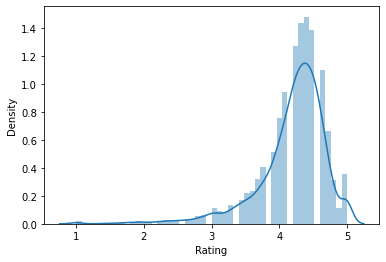

In [67]:
sns.distplot(df['Rating'])
plt.show()


# Here you can see three measures position on the plot. So, you will find that: mean less than the mode median less than the mode mean less than median Here the distribution tells that most of the rating is in between 4 to 5.

# The distributions in real life are generally skewed. Many statistical models fail when there is too much skewness in the data. As a result, with skewed data, the tail region may act as an outlier for the statistical model, and we know that outliers have a negative impact on model performance, particularly in regression-based models. As a result, the skewed data must be transformed to be as close to a Gaussian distribution as possible.

# 6. What are the top Content Rating values?
# a. Are there any values with very few records?
# b. If yes, drop those as they won’t help in the analysis

In [68]:
df['Content Rating'].value_counts()

Everyone           7414
Teen               1083
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

# Adults only as it holds only 3 and unrated only 1

In [69]:
Adult_rating = df[df['Content Rating'] == 'Adults only 18+'].index.to_list()
unrated =df[df['Content Rating'] == 'Unrated'].index.to_list()
df.drop(Adult_rating, inplace = True)
df.drop(unrated, inplace = True)
df['Content Rating'].value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Everyone        7414
Teen            1083
Mature 17+       461
Everyone 10+     397
Name: Content Rating, dtype: int64

# 7. Effect of size on rating
# a. Make a joinplot to understand the effect of size on rating
# b. Do you see any patterns?
# c. How do you explain the pattern?

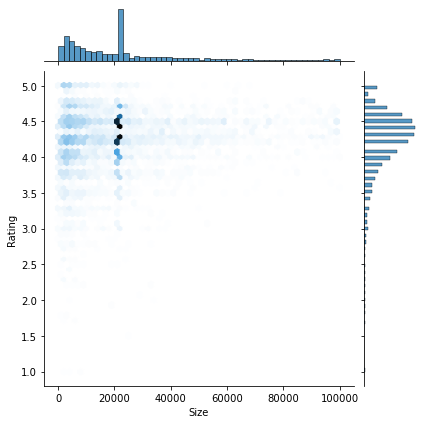

In [76]:
sns.jointplot(x=df['Size'],y=df['Rating'],data=df,kind='hex')
plt.show()
# hex, kde, hist, dist are different types of it.

# Below 40 mb data apps received a huge good Rating

# 8. Effect of price on rating
# a. Make a jointplot (with regression line)
# b. What pattern do you see?
# c. How do you explain the pattern?
# d. Replot the data, this time with only records with price > 0
# e. Does the pattern change?
# f. What is your overall inference on the effect of price on the rating

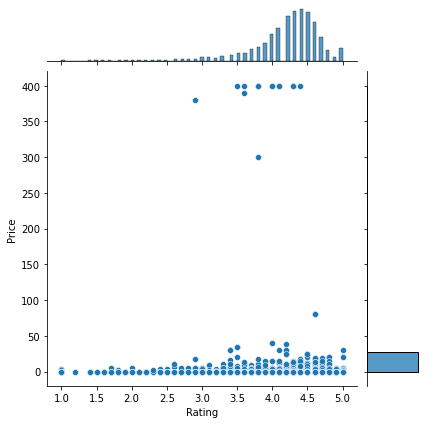

In [78]:
sns.jointplot(x ="Rating" , y = "Price" ,data = df)
plt.show()

# There exists a directly proportional relation between price and rating 

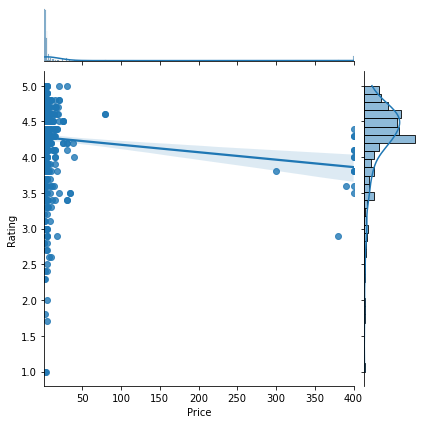

In [79]:
Price_greaterthan_zero = df[df['Price'] > 0]
sns.jointplot(x ="Price" , y = "Rating" ,data = Price_greaterthan_zero, kind = "reg" )
plt.show()

# Yes the pattern has varied slightly

# 9. Look at all the numeric interactions together –
# a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

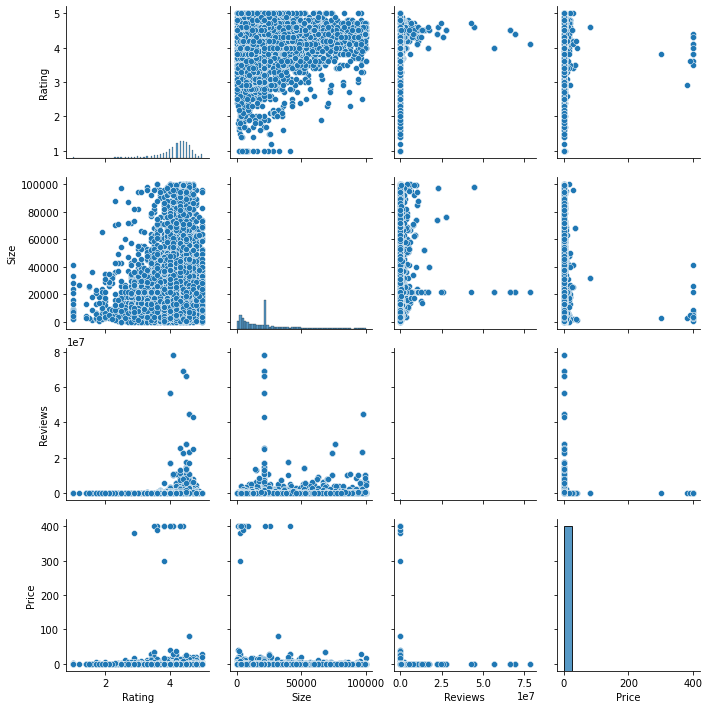

In [81]:
sns.pairplot(df,vars=['Rating','Size', 'Reviews', 'Price'])
plt.show()

# 10. Rating vs. content rating
# a. Make a bar plot displaying the rating for each content rating
# b. Which metric would you use? Mean? Median? Some other quantile?
# c. Choose the right metric and plot

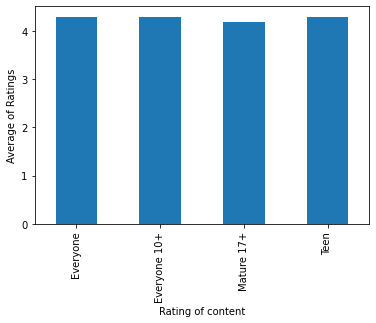

In [82]:
a = df['Rating'].groupby(df['Content Rating']).median().plot(kind = 'bar')
a.set(xlabel ='Rating of content', ylabel = 'Average of Ratings')
plt.show()

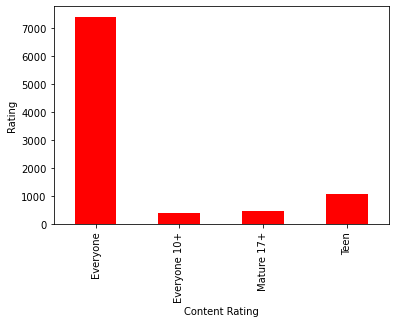

In [87]:
df.groupby(['Content Rating'])['Rating'].count().plot.bar(color="r")
plt.ylabel('Rating')
plt.show()# quantile we have used is count not mean and median

# 11. Content rating vs. size vs. rating – 3 variables at a time
# a. Create 5 buckets (20% records in each) based on Size
# b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination
# c. Make a heatmap of this
# i. Annotated
# ii. Greens color map
# d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


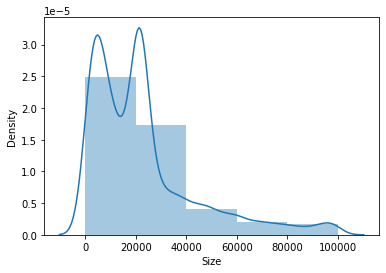

In [88]:
sns.distplot(df["Size"], bins=5)
plt.show()

In [92]:
bins=[0, 5100, 14000, 21516, 34000, 100000]
df['Size_Buckets'] = pd.cut(df['Size'], bins, labels=['VERY LOW','LOW','MED','HIGH','VERY HIGH'])
pd.pivot_table(df, values='Rating', index='Size_Buckets', columns='Content Rating')

<ipython-input-92-7fac7ea7a972>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size_Buckets'] = pd.cut(df['Size'], bins, labels=['VERY LOW','LOW','MED','HIGH','VERY HIGH'])


Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
VERY LOW,4.112653,4.189474,4.112281,4.198165
LOW,4.167516,4.251282,4.057292,4.221893
MED,4.254010,4.253153,4.098592,4.207101
HIGH,4.164042,4.226761,4.174603,4.228462
VERY HIGH,4.220790,4.283439,4.194175,4.276855


In [90]:
df.Size.quantile([0.2, 0.4,0.6,0.8])

0.2     5100.0
0.4    14000.0
0.6    21516.0
0.8    34000.0
Name: Size, dtype: float64

In [91]:

df.Rating.quantile([0.2, 0.4,0.6,0.8])

0.2    3.9
0.4    4.2
0.6    4.4
0.8    4.6
Name: Rating, dtype: float64

In [93]:
Size_Buckets =pd.pivot_table(df, values='Rating', index='Size_Buckets', columns='Content Rating', 
                     aggfunc=lambda x:np.quantile(x,0.2))
Size_Buckets #0.2 20 % deviation 

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
VERY LOW,3.8,3.86,3.42,3.8
LOW,3.8,4.06,3.60,3.9
MED,4.1,4.10,4.00,4.0
HIGH,3.8,4.00,3.90,4.0
VERY HIGH,4.0,4.02,4.00,4.0


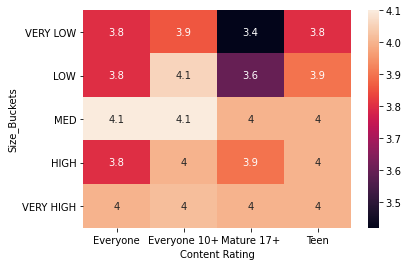

In [94]:
sns.heatmap(Size_Buckets, annot = True)
plt.show()

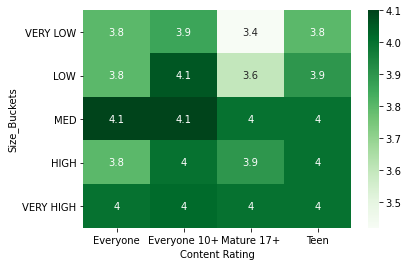

In [106]:
sns.heatmap(Size_Buckets, annot=True, cmap='Greens')
plt.show()

# Yes, in all of the Content Ratings, the majority of heavier apps appear to be favoured. However, there are no significant differences in it. Except for Mature 17+, when smaller apps aren't favoured above more variety.